# Tareas

In [40]:
%matplotlib inline
from __future__ import division
from IPython.html.widgets import interact
import numpy as np
import random
import math
import matplotlib.pyplot as plt

## Problema 1

Utilizando el código de runge-kutta de segundo orden como base, implemente el código de runge-kutta de cuarto orden. La función debe de llamarse `rk4`. 

In [2]:
def rk4(t, y, h, D):
    k1 = D(t, y)
    k2 = D(t + h/2, y + h/2*k1)
    k3 = D(t + h/2, y + h/2*k2)
    k4 = D(t + h, y + h*k3)
    
    return y + h / 6 * (k1 + 2*k2 + 2*k3 + k4)

## Problema 2

La tasa a la cual un recurso finito es recogido depende de la dificultad y de la demanda. Supón que la demanda $D$ se incrementa con la cantidad extraída $E$:

$$\dot D = \alpha E$$

Supón que la dificultad de extracción $W$ es inversamente dependiente de la fracción restante del recurso:

$$
W = \frac{1}{1 -E}
$$

Finalmente, supón que la tasa de extracción $R$ es la razón de la demanda a la dificultad.

$$ R = \dot E = \frac{D}{W} $$

Por último, el costo $C$ del recurso depende de la tasa de la extracción y de la demanda:

$$ C = \frac{D}{R}\xi,$$

donde $\xi$ es un factor de escala.

In [84]:
# x = [D,E]

def euler(t, y, h, D):
    return y + h*D(t, y)

def W(x):
    return 1 / (1 - x[1])

def diff(x):
    return np.array([alpha * x[1], x[0] / W(x)])

(a) Escribe un programa que dibuja la tasa de la extracción y el costo como una función del tiempo. Usando las condiciones iniciales: $D_0 = 0.1$, $E_0 = 0.1$,  $\alpha = 2.0$ y $\xi = 0.01$. Grafica de 0 a 5 unidades de tiempo. 

In [86]:
def solve(f, _alpha = 2, _xi = .01, shouldPlot = True):
    global alpha
    global xi
    
    alpha = _alpha
    xi = _xi
    d_0 = .1
    e_0 = .1

    N = 1000
    DE = np.empty([N,2])
    DE[0] = np.array([d_0, e_0])
    T = 5
    h = T/N
    t = np.linspace(0, T, num=N)

    for x in range(N-1):
        DE[x+1] = f(t[x], DE[x], h, lambda _,b: diff(b))
    
    if not shouldPlot:
        return
    
    dE = np.empty(N)
    for x in range(N):
        dE[x] = diff(DE[x])[1]
        
    cost = np.empty(N)
    for x in range(N):
        cost[x] = xi * DE[x,0] / dE[x]

    plt.figure(figsize = (6,6))
    plt.plot(t, dE, label = 'Tasa de extraccion')
    plt.plot(t, cost, label = 'Costo')
    plt.legend(loc = 'best')
    plt.show()

(b) Resuelve con `rk4` y con  `euler`. Compara los tiempos y los resultados. ¿Qué puedes concluir?

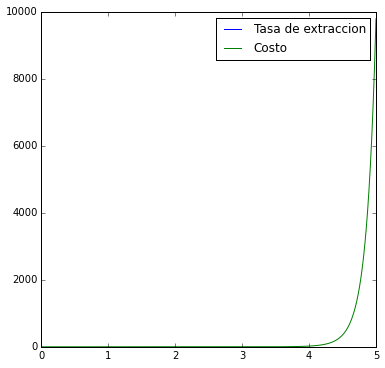

In [94]:
solve(rk4)

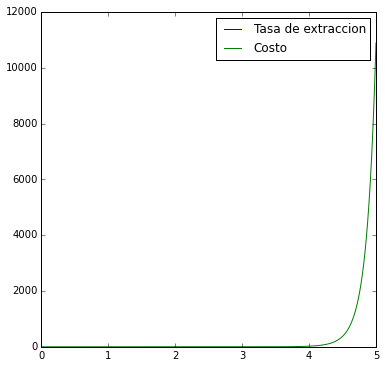

In [95]:
solve(euler)

In [92]:
%timeit solve(rk4, shouldPlot = False)

10 loops, best of 3: 38.1 ms per loop


In [93]:
%timeit solve(euler, shouldPlot = False)

100 loops, best of 3: 8.8 ms per loop


Podemos ver que el método de Euler es varias veces más rápido.

(c) Agrega un _widget_ para los valores de $\alpha$ y $\xi$.

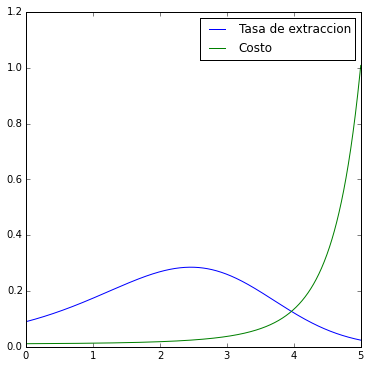

In [89]:
def interactSolve(alpha, xi):
    solve(rk4, _alpha = alpha, _xi = xi)
interact(interactSolve, alpha = (0, 5, .01), xi = (0, .1, .01));

(d) Discute la dinámica del sistema en general y menciona algunos hallazgos interesantes para diferentes valores y condiciones iniciales.

Jugando con el interact, pude observar que el costo crece exponencialmente con xi. Por su parte, la tasa de extracción parece siempre llegar a un máximo y luego desplomarse. Alpha parece ajustar cuánto tiempo toma en alcanzar el máximo. Evidentemente, el costo se dispara al cielo cuando el tiempo pasa, ya que la tasa de extracción disminuye ridículamente.

## Problema 3

(a) Calcular el valor de $\pi$ usando métodos de Monte Carlo.

In [5]:
hits = 0
tries = 10000000

for x in range(tries):
    if random.random()**2 + random.random()**2 <= 1:
        hits += 1

# hits / tries \approx pi / 4

print "Pi is approximately ", 4 * hits / tries

Pi is approximately  3.1410372


(b) El "volumen" de una 2-esfera (un círculo)   $x^2 + y^2 = r^2$ es 

$$\pi r^2,$$

el volumen de la 3-esfera $x^2 + y^2 + z^2 = r^2$ es 


$$\frac{4}{3} \pi r^3,$$


La 4-esfera $x^2 + y^2 + z^2 + w^2 = r^2$, podemos suponer (usando los ejemplos anteriores) que el hipervolumen de la 4-esfera es 

$$\alpha\pi r^4,$$


Usando técnicas de Monte Carlo estima $\alpha$.

In [7]:
# Si elegimos r = 1 y tomamos elementos en [0,1]^n, obtenemos hits / tries = alpha pi / 2^n

for n in range(5):
    hits = 0
    tries = 10000000

    for x in range(tries):
        if sum([random.random()**2 for i in range(n)]) <= 1:
            hits += 1

    print "For n =", n, "alpha is approximately", 2**n * hits / tries / math.pi
    
# Wikipedia dice que estoy bien :3 http://en.wikipedia.org/wiki/Volume_of_an_n-ball#Low_dimensions

For n = 0 alpha is approximately 0.318309886184
For n = 1 alpha is approximately 0.636619772368
For n = 2 alpha is approximately 1.00016416718
For n = 3 alpha is approximately 1.33300821009
For n = 4 alpha is approximately 1.57085877902
